# Imports

In [1]:
import numpy.typing as npt
import numpy as np
import nnfs
from nnfs.datasets import spiral_data, vertical_data
import matplotlib.pyplot as plt

# Activation Functions

In [2]:
class ActivationFunctions:
    @staticmethod
    def linear(sample: npt.NDArray[np.float64]) -> npt.NDArray[np.float64]:
        return sample

    @staticmethod
    def step(sample: npt.NDArray[np.float64]) -> npt.NDArray[np.float64]:
        return np.where(sample >= 0, 1, 0)

    @staticmethod
    def ReLu(sample: npt.NDArray[np.float64]) -> npt.NDArray[np.float64]:
        return np.maximum(sample, 0)

    @staticmethod
    def sigmoid(sample: npt.NDArray[np.float64]) -> npt.NDArray[np.float64]:
        return 1 / (1 + np.exp(-sample))

    @staticmethod
    def softmax(sample: npt.NDArray[np.float64]) -> npt.NDArray[np.float64]:
        exp_sample = np.exp(sample - np.max(sample, axis=1, keepdims=True))
        return exp_sample / np.sum(exp_sample, axis=1, keepdims=True)

# Layer Class

In [3]:
class Layer:
    def __init__(self, inputs):
        if len(inputs) < 1:
            raise ValueError("Need at least one data")
        if len(inputs[0]) < 1:
            raise ValueError("Need at least one neuron")
        self.output = inputs

    def getoutput(self):
        return self.output

    def getsize(self):
        return len(self.output[0])

    def getbatchsize(self):
        return len(self.output)

class HiddenLayer(Layer):
    def __init__(self, prevLayer, numOfNeurons: int, weightss = None, biass = None, actfunc = ActivationFunctions.linear):
        self.activationfunc = actfunc
        self.input = prevLayer
        self.batchsize = self.input.getbatchsize()
        super().__init__([[0] * numOfNeurons for _ in range(self.batchsize)])
        self.layerShape = numOfNeurons
        self.weights = weightss or 0.1 * np.random.randn(self.input.getsize(), self.layerShape)
        self.biases = biass or np.zeros((1, self.layerShape))
        if weightss and biass:
            if len(weightss) != len(biass) != numOfNeurons:
                raise ValueError("Number of weights or biases doesn't match number of neurons.")
            for weigh in weightss:
                if len(weigh) != self.input.getsize():
                    raise ValueError("At least one of the neuron's weights doesn't match the given input layer")

    def tweek_node_bias(self, neuron: int, db: int):
        if neuron < 0 or neuron >= self.layerShape:
            raise ValueError(f"neuron {neuron} is outOfBounds. There are {self.layerShape} neurons.")
        self.biases[neuron] += db

    def tweek_node_weights(self, neuron: int, input: int, dw: int):
        if neuron < 0 or neuron >= self.layerShape:
            raise ValueError(f"neuron {neuron} is outOfBounds. There are {self.layerShape} neurons.")
        if neuron < 0 or neuron >= self.layerShape:
            raise ValueError(f"neuron {neuron} is outOfBounds. There are {self.input.getsize()} neurons in the previous layer.")
        self.weights[neuron][input] += dw

    def forward(self):
        self.input.forward()
        pre_func = np.dot(np.array(self.input.getoutput()), np.array(self.weights)) + self.biases
        self.output = self.activationfunc(pre_func)


class InputLayer(Layer):
    def __init__(self, inputs):
        super().__init__(inputs)

    def forward(self):
        return self.output

# Initializations

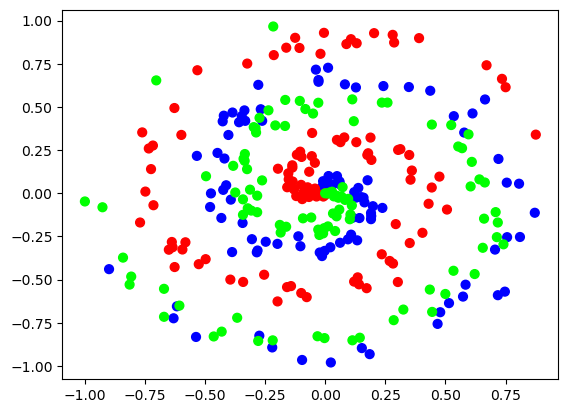

In [4]:
nnfs.init()

X, y = vertical_data(100, 3)
spiral_X, spiral_y = spiral_data(100, 3)
plt.scatter(spiral_X[:, 0], spiral_X[:, 1], c=y, s=40, cmap='brg')
plt.show()

spiral_X_layer = InputLayer(spiral_X)
spiral_layer1 = HiddenLayer(spiral_X_layer, 3, actfunc=ActivationFunctions.ReLu)
spiral_layer2 = HiddenLayer(spiral_layer1, 3, actfunc=ActivationFunctions.softmax)

# Running

In [5]:
spiral_layer2.forward()
spiral_layer2.getoutput()

array([[0.33333334, 0.33333334, 0.33333334],
       [0.333444  , 0.3332525 , 0.33330357],
       [0.33352143, 0.3331521 , 0.33332652],
       [0.3336591 , 0.3330953 , 0.33324558],
       [0.33370215, 0.33297026, 0.3333276 ],
       [0.3338902 , 0.3329266 , 0.33318326],
       [0.33396068, 0.3328751 , 0.33316422],
       [0.3340491 , 0.33271194, 0.33323893],
       [0.33403364, 0.33282185, 0.33314458],
       [0.33420312, 0.3326981 , 0.33309877],
       [0.3344455 , 0.33252123, 0.33303323],
       [0.33451766, 0.3324686 , 0.33301377],
       [0.3336705 , 0.33308697, 0.33324248],
       [0.33334616, 0.33332396, 0.3333299 ],
       [0.3339714 , 0.33286723, 0.33316132],
       [0.33342057, 0.33326963, 0.33330986],
       [0.33340758, 0.33327907, 0.33331335],
       [0.33333334, 0.33333334, 0.33333334],
       [0.33356205, 0.33326006, 0.33317792],
       [0.33453584, 0.33245537, 0.33300886],
       [0.33346626, 0.33329073, 0.33324298],
       [0.33333334, 0.33333334, 0.33333334],
       [0.